In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models 
import matplotlib.pyplot as plt

In [2]:
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

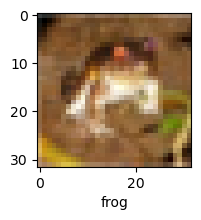

In [10]:
plot_sample(X_train,y_train,0)

In [11]:
X_train=X_train/255
X_test=X_test/255

on applying ANN(Artifical neural networks)

In [12]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)
#use categorical_cross entropy when data is hot encoded, use sparse_categorical_crossentropy when data is an integer value 

C:\Users\rauna\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.3026 - loss: 1.9273
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4281 - loss: 1.6322
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.4541 - loss: 1.5486
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4778 - loss: 1.4842
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.4958 - loss: 1.4267


ANN performs really bad at image processing the accuracy of model is just 50 percent 

On applying CNN(convolutional neural networks)

In [13]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\rauna\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.3850 - loss: 1.6970
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6126 - loss: 1.1190
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6630 - loss: 0.9672
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6947 - loss: 0.8761
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7247 - loss: 0.7937
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7428 - loss: 0.7376
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7625 - loss: 0.6898
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7747 - loss: 0.6425
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7861 - loss: 0.6066
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8022 - loss: 0.5622


In [17]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6869 - loss: 0.9468


[0.9670211672782898, 0.6915000081062317]

using cnn we got an ccuracy of 70%

In [21]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.0322010e-04, 6.5033196e-04, 4.4084407e-04, 9.1391945e-01,
        5.7105281e-05, 8.2367674e-02, 8.4790675e-04, 2.0584317e-04,
        9.9845149e-04, 1.0914362e-04],
       [1.7463230e-03, 6.8930453e-03, 9.8206310e-06, 1.2840474e-07,
        2.2257803e-08, 4.2458495e-11, 1.6731738e-08, 2.1526214e-09,
        9.8984164e-01, 1.5089698e-03],
       [1.0983156e-01, 5.2977437e-01, 2.8273920e-03, 8.5871411e-04,
        3.0760269e-04, 3.7458583e-05, 5.5276840e-05, 4.2062514e-03,
        3.1876490e-01, 3.3336539e-02],
       [4.5994538e-01, 5.1229280e-01, 3.5389704e-03, 4.0181470e-04,
        2.6448534e-04, 1.1138487e-05, 1.4095710e-05, 8.4783946e-04,
        2.0580534e-02, 2.1029206e-03],
       [3.7716695e-06, 1.3811124e-05, 1.1979830e-02, 2.0007838e-02,
        5.7759243e-01, 8.0740545e-04, 3.8957146e-01, 1.6181122e-05,
        6.5033519e-06, 8.0600182e-07]], dtype=float32)

In [24]:
import numpy as np

In [25]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 1, 1, 4]

TypeError: only integer scalar arrays can be converted to a scalar index

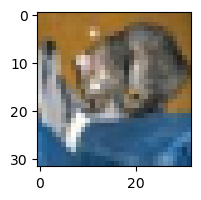

In [26]:
plot_sample(X_test,y_test,0)

In [27]:
classes[y_classes[0]]

'cat'

TypeError: only integer scalar arrays can be converted to a scalar index

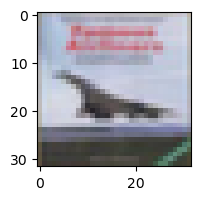

In [28]:
plot_sample(X_test,y_test,3)

In [29]:
classes[y_classes[3]]

'automobile'